In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/NewDriveD/COding/Alok_mastor/Alok-Mastor/Dataset/parkinsons_updrs.csv')
# data.head()

In [3]:
# Check for NaN values
nan_values = data.isna().sum()
# print(nan_values)

# Correct NaN values by filling them with appropriate values
# data.fillna(value, inplace=True)


In [4]:
skewness = data.skew()
# print(skewness)


In [5]:
import pandas as pd
import numpy as np

# Assuming 'data' is the DataFrame containing your dataset
column_names = list(data.columns)

outliers = []
for col_name in column_names:
    # Calculate the IQR for the column
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the upper and lower bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find the outliers in the column
    column_outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    outliers.append(column_outliers)

# Print the outliers for each column
# for i, col_name in enumerate(column_names):
#     print(f"Outliers in column '{col_name}':")
#     print(outliers[i])
#     print()


In [6]:

column_names = list(data.columns)
column_names = column_names[:-1]

skewedCols = []
for names in column_names:
    skewVal = data[names].skew()
    if(skewVal>1 or skewVal<-1):
        skewedCols.append(names)
# print(skewedCols)
# print(len(skewedCols))

#   Name of the cols containing atleast one negative value
skewedCols_NegativeVals = []
for col_name in skewedCols:
    for values in data[col_name]:
        if(values < 0):
            skewedCols_NegativeVals.append(col_name)
            break
# print(len(skewedCols_NegativeVals))

#   Name of the cols containing atleast one zero values
skewedCols_ZeroVals = []
for col_name in skewedCols:
    if col_name in skewedCols_NegativeVals:
        continue
    else:
        for values in data[col_name]:
            if(values == 0):
                skewedCols_ZeroVals.append(col_name)
                break
# print(len(skewedCols_ZeroVals))

#   Name of the cols containing only positive values
skewedCols_PositiveVals = []
for col_name in skewedCols:
    if (col_name not in skewedCols_NegativeVals and col_name not in skewedCols_ZeroVals):
        skewedCols_PositiveVals.append(col_name)
# print(len(skewedCols_PositiveVals))

#   Box-Cox Transformation
for col_name in skewedCols_PositiveVals:
    data[col_name] = stats.boxcox(data[col_name],lmbda=0)

count = 0
for col_name in skewedCols_PositiveVals:
    skewVal = data[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1
# print(count)
# print(data)

#   CubeRoot Transformation on skewedCols_NegativeVals & skewedCols_ZeroVals
for col_name in skewedCols_NegativeVals:
    data[col_name] = np.cbrt(data[col_name])
for col_name in skewedCols_ZeroVals:
    data[col_name] = np.cbrt(data[col_name])

count = 0
for col_name in skewedCols_NegativeVals:
    skewVal = data[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1
# print(count)
# print(data)

import statistics
for col_name in column_names:
    qi = data[col_name].quantile(0.25)
    qf = data[col_name].quantile(0.75)

    iqr = qf - qi
    c = 1.5
    upper_limit=qf+c*iqr
    lower_limit=qi-c*iqr

    col_median = statistics.mean(data[col_name].to_numpy())
    for val in data[col_name]:
        if val < lower_limit or val > upper_limit:
            data[col_name] = data[col_name].replace(val,col_median)


In [8]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,severity
0,1,72,0,5.6431,28.199,34.398,-5.017660,-10.295050,-5.518964,-5.754024,...,-4.241917,-4.335907,-4.097148,-3.143305,-4.248195,21.640,0.41888,0.54842,0.16006,1
1,1,72,0,12.6660,28.447,34.894,-5.809143,-10.994132,-6.630124,-6.502290,...,-4.611188,-4.535644,-4.081034,-3.512576,-4.499730,27.183,0.43493,0.56477,0.10810,1
2,1,72,0,19.6810,28.695,35.389,-5.337058,-10.611951,-6.189915,-6.175387,...,-4.914416,-4.774773,-4.228105,-3.815804,-3.901083,23.047,0.46222,0.54405,0.21014,1
3,1,72,0,25.6470,28.905,35.810,-5.243829,-10.535728,-6.260652,-5.936976,...,-4.504420,-4.370098,-3.930696,-3.406109,-3.581389,24.445,0.48730,0.57794,0.33277,1
4,1,72,0,33.6420,29.187,36.375,-5.698795,-10.812803,-6.980326,-6.645391,...,-4.992304,-4.678817,-4.006883,-3.894183,-4.454597,26.126,0.47188,0.56122,0.19361,1


In [7]:
data['severity'] = data['motor_UPDRS'].apply(lambda x: 0 if 0 < x < 20 else 1)

In [13]:
Y1 = data['severity']
# Y2 = data['motor_UPDRS']
X1 = data.drop(['subject#', 'motor_UPDRS', 'age','sex','test_time','severity'], axis=1)
X2 = data.drop(['subject#', 'total_UPDRS', 'age','sex','test_time','severity'], axis=1)
print(X2.shape)
print(Y1.shape)

(5875, 17)
(5875,)


<h3><b>Scikit-Learn

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.1, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 20, 10), max_iter=1, alpha=0.001, random_state=42, warm_start=True)

# Lists to store the training and testing accuracy for each epoch
train_acc_list = []
test_acc_list = []

# Number of epochs
n_epochs = 10000

for _ in range(n_epochs):
    # Fit the classifier to the training data
    clf.fit(X_train_scaled, Y1_train)

    # Predict the labels of the training set
    Y1_train_pred = clf.predict(X_train_scaled)

    # Calculate the training accuracy
    accuracy_train = accuracy_score(Y1_train, Y1_train_pred)
    train_acc_list.append(accuracy_train)

    # Predict the labels of the test set
    Y1_test_pred = clf.predict(X_test_scaled)

    # Calculate the test accuracy
    accuracy_test = accuracy_score(Y1_test, Y1_test_pred)
    test_acc_list.append(accuracy_test)

# # Print the training and test accuracy for each epoch
# for epoch in range(n_epochs):
#     print(f'Epoch {epoch+1}/{n_epochs}')
#     print(f'Training Accuracy: {train_acc_list[epoch]:.4f}')
#     print(f'Test Accuracy: {test_acc_list[epoch]:.4f}')

c:\NewDriveD\Anaconda\anaconda3\envs\python_3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\NewDriveD\Anaconda\anaconda3\envs\python_3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\NewDriveD\Anaconda\anaconda3\envs\python_3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\NewDriveD\Anaconda\anaconda3\envs\python_3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
 

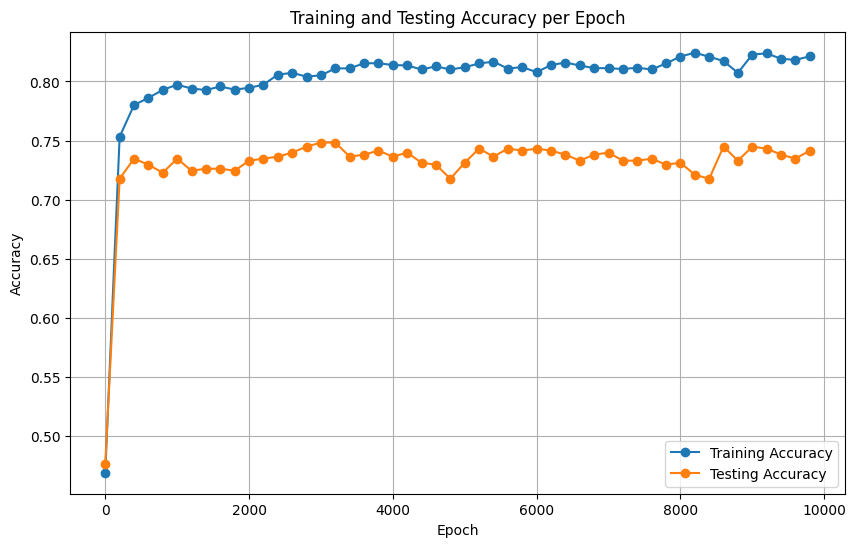

In [20]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot(range(0, len(train_acc_list), 200), train_acc_list[::200], label='Training Accuracy', marker='o')

# Plot the testing accuracy
plt.plot(range(0, len(test_acc_list), 200), test_acc_list[::200], label='Testing Accuracy', marker='o')

# Add a legend
plt.legend()

# Add title and labels for the axes
plt.title('Training and Testing Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 20, 10), max_iter=10000, alpha=0.001, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_scaled, Y1_train)

# Predict the labels of the training set
Y1_train_pred = clf.predict(X_train_scaled)

# Calculate the training accuracy
accuracy_train = accuracy_score(Y1_train, Y1_train_pred)

# Predict the labels of the test set
Y1_test_pred = clf.predict(X_test_scaled)

# Calculate the test accuracy
accuracy_test = accuracy_score(Y1_test, Y1_test_pred)

# Print the training and test accuracy
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}')

<h3><b>Using PyTorch

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Define the neural network model
class ClassificationModel(nn.Module):
    def __init__(self, input_size, h1,h2,h3, output_size):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        # self.relu = nn.ReLU()
        self.fc4 = nn.Linear(h3, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        # x= self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X2, Y1, test_size=0.1, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y1_train_tensor = torch.tensor(Y1_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y1_test_tensor = torch.tensor(Y1_test.values, dtype=torch.long)

# Define the hyperparameters
input_size = X_train.shape[1]
h1=10
h2=20
h3=10
output_size = 2
learning_rate = 0.001
num_epochs = 20000

# Create an instance of the classification model
model = ClassificationModel(input_size, h1,h2,h3, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, Y1_train_tensor)

#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Calculate training accuracy
#     _, predicted_labels_train = torch.max(outputs, 1)
#     accuracy_train = (predicted_labels_train == Y1_train_tensor).sum().item() / Y1_train_tensor.size(0)

#     # Print the loss and training accuracy for every 50 epochs
#     if (epoch+1) % 50 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {accuracy_train:.4f}')

# # Evaluate the model on the testing set
# with torch.no_grad():
#     predicted_Y1 = model(X_test_tensor)
#     _, predicted_labels = torch.max(predicted_Y1, 1)
#     accuracy = (predicted_labels == Y1_test_tensor).sum().item() / Y1_test_tensor.size(0)
#     print(f'Test Accuracy: {accuracy:.4f}')
# Initialize variables to keep track of the best model and its metrics
best_model = None
best_epoch = -1
best_loss = float('inf')
best_accuracy_train = 0
best_accuracy_test = 0

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y1_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_labels_train = torch.max(outputs, 1)
    accuracy_train = (predicted_labels_train == Y1_train_tensor).sum().item() / Y1_train_tensor.size(0)

    # Evaluate on the testing set
    with torch.no_grad():
        predicted_Y1 = model(X_test_tensor)
        _, predicted_labels = torch.max(predicted_Y1, 1)
        accuracy_test = (predicted_labels == Y1_test_tensor).sum().item() / Y1_test_tensor.size(0)

    # Check if this model is better than the previous best model
    if loss.item() < best_loss:
        best_model = model
        best_epoch = epoch
        best_loss = loss.item()
        best_accuracy_train = accuracy_train
        best_accuracy_test = accuracy_test

    # Print the loss and training and testing accuracy for every 50 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {accuracy_train:.4f}, Testing Accuracy: {accuracy_test:.4f}')

# Print the metrics for the best model
print(f'Best Model, Epoch [{best_epoch+1}/{num_epochs}], Loss: {best_loss:.4f}, Training Accuracy: {best_accuracy_train:.4f}, Testing Accuracy: {best_accuracy_test:.4f}')

Epoch [100/20000], Loss: 0.3872, Training Accuracy: 0.9478, Testing Accuracy: 0.9524
Epoch [200/20000], Loss: 0.3453, Training Accuracy: 0.9765, Testing Accuracy: 0.9711
Epoch [300/20000], Loss: 0.3325, Training Accuracy: 0.9864, Testing Accuracy: 0.9847
Epoch [400/20000], Loss: 0.3274, Training Accuracy: 0.9898, Testing Accuracy: 0.9864
Epoch [500/20000], Loss: 0.3249, Training Accuracy: 0.9902, Testing Accuracy: 0.9864
Epoch [600/20000], Loss: 0.3233, Training Accuracy: 0.9913, Testing Accuracy: 0.9881
Epoch [700/20000], Loss: 0.3222, Training Accuracy: 0.9919, Testing Accuracy: 0.9915
Epoch [800/20000], Loss: 0.3215, Training Accuracy: 0.9928, Testing Accuracy: 0.9915
Epoch [900/20000], Loss: 0.3209, Training Accuracy: 0.9932, Testing Accuracy: 0.9915
Epoch [1000/20000], Loss: 0.3203, Training Accuracy: 0.9939, Testing Accuracy: 0.9915
Epoch [1100/20000], Loss: 0.3198, Training Accuracy: 0.9949, Testing Accuracy: 0.9915
Epoch [1200/20000], Loss: 0.3195, Training Accuracy: 0.9943, Te

In [20]:
import joblib

# Save the best model as a pkl file
joblib.dump(best_model, 'best_model_motor.pkl')

['best_model_motor.pkl']

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the test set using the best model
Y1_pred = best_model(X_test_tensor)

# Get the predicted labels
_, predicted_labels = torch.max(Y1_pred, 1)

# Calculate the confusion matrix
cr = classification_report(Y1_test_tensor, predicted_labels)

cm = confusion_matrix(Y1_test_tensor, predicted_labels)

# Print the confusion matrix
print(cr)
print("Confusion Matrix:")
print(cm)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       308

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588

Confusion Matrix:
[[280   0]
 [  1 307]]


<b>Considering the total_updrs </b>best model has a training loss =  0.3552, Training Accuracy: 0.9580, Testing Accuracy: 0.9371

<b>Considering the total_updrs </b>best model has a training Loss: 0.3140, Training Accuracy: 0.9992, Testing Accuracy: 0.9983

----------------------------------------<h1>Done</h1>----------------------------------------------------------

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.1, random_state=42)

# Create an instance of the SVC classifier
model = SVC()

# Train the model on the training data
model.fit(X_train, Y1_train)

# Make predictions on the testing data
Y1_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y1_test, Y1_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5459


In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.1, random_state=42)

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=Y1_train)
dtest = xgb.DMatrix(X_test, label=Y1_test)

# Set the hyperparameters for the XGBoost regressor
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the XGBoost regressor
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

from sklearn.metrics import r2_score

# Make predictions on the testing set
y_pred = model.predict(dtest)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(Y1_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.4f}')

# Calculate the R2 score
r2 = r2_score(Y1_test, y_pred)
print(f'R2 Score: {r2:.4f}')

Root Mean Squared Error: 9.2195
R2 Score: 0.2042


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size,h1, h2,h3, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(h1, h2)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(h2, h3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(h3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x= self.relu(x)
        x = self.fc3(x)
        x= self.relu(x)
        x = self.fc4(x)
        return x

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.1, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y1_train_tensor = torch.tensor(Y1_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y1_test_tensor = torch.tensor(Y1_test.values, dtype=torch.float32)

# Define the hyperparameters
input_size = X_train.shape[1]
h1 = 32
h2 = 16
h3 = 8
output_size = 1
learning_rate = 0.05
num_epochs = 1000

# Create an instance of the regression model
model = RegressionModel(input_size,h1, h2, h3, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, Y1_train_tensor)

#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Print the loss for every 10 epochs
#     if (epoch+1) % 50 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# # Evaluate the model on the testing set
# with torch.no_grad():
#     predicted_Y1 = model(X_test_tensor)
#     test_loss = criterion(predicted_Y1, Y1_test_tensor)
#     print(f'Test Loss: {test_loss.item():.4f}')

from sklearn.metrics import r2_score

# Initialize a list to keep track of the loss for the last 10 epochs
last_10_losses = [None] * 10

while True:
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y1_train_tensor)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the list of last 10 losses
        last_10_losses.pop(0)
        last_10_losses.append(loss.item())

        # Check if the loss for the last 10 epochs is the same
        if len(set(last_10_losses)) == 1 and None not in last_10_losses:
            print(f'Loss: {loss.item()} for last 10 epochs. Stopping...')
            break
        else:
            # Calculate training R2 score
            train_r2 = r2_score(Y1_train_tensor.detach().numpy(), outputs.detach().numpy())
            if((epoch+1) % 50 == 0):
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training R2: {train_r2:.4f}')
            # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training R2: {train_r2:.4f}')

    # If the loop was broken, stop training
    if len(set(last_10_losses)) == 1 and None not in last_10_losses:
        break

# Evaluate the model on the testing set
with torch.no_grad():
    predicted_Y1 = model(X_test_tensor)
    test_loss = criterion(predicted_Y1, Y1_test_tensor)
    # Calculate testing R2 score
    test_r2 = r2_score(Y1_test_tensor.detach().numpy(), predicted_Y1.detach().numpy())
    print(f'Test Loss: {test_loss.item():.4f}, Test R2: {test_r2:.4f}')


Epoch [50/1000], Loss: 128.7202, Training R2: -0.2253
Epoch [100/1000], Loss: 119.0726, Training R2: -0.0881
Epoch [150/1000], Loss: 117.7274, Training R2: -0.0559
Epoch [200/1000], Loss: 117.0648, Training R2: -0.0407
Epoch [250/1000], Loss: 116.7153, Training R2: -0.0295
Epoch [300/1000], Loss: 116.4413, Training R2: -0.0226
Epoch [350/1000], Loss: 116.2805, Training R2: -0.0180
Epoch [400/1000], Loss: 116.1499, Training R2: -0.0182
Epoch [450/1000], Loss: 116.0157, Training R2: -0.0200
Epoch [500/1000], Loss: 115.8666, Training R2: -0.0210
Epoch [550/1000], Loss: 115.7100, Training R2: -0.0200
Epoch [600/1000], Loss: 115.7758, Training R2: -0.0208
Epoch [650/1000], Loss: 115.5608, Training R2: -0.0170
Epoch [700/1000], Loss: 121.8288, Training R2: -0.0786
Epoch [750/1000], Loss: 115.5449, Training R2: -0.0172
Epoch [800/1000], Loss: 115.4399, Training R2: -0.0129
Epoch [850/1000], Loss: 115.3915, Training R2: -0.0117
Epoch [900/1000], Loss: 115.3882, Training R2: -0.0095
Epoch [950/

KeyboardInterrupt: 

In [22]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.1, random_state=42)

# Create an instance of TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)

# Fit the TPOTRegressor on the training data
tpot.fit(X_train, Y1_train)

# Print the best pipeline found by TPOT
print(tpot.fitted_pipeline_)


                                                                               
                                                                               
TPOT closed during evaluation in one generation.
                                                                               
                                                                               
TPOT closed prematurely. Will use the current best pipeline.
                                                                               
Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=20, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.5, verbosity=0)
Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
